In [8]:
# Remove warnings
import warnings

warnings.filterwarnings('ignore')

# Data manipulation 
import pandas as pd
import matplotlib.pyplot as plt

# Linear algrebra
import numpy as np

# Technical indicators
from ta.momentum import stochrsi
from ta.trend import ema_indicator

from modules.Utils.utils import loadFromDB, strategyTester
from modules.Utils.indicators import computeSuperTrend

# Crossover

In [9]:
SYMBOL='BTC'
df = loadFromDB(SYMBOL,'1h')
df['EMA20'] = ema_indicator(df.Close,28)
df['EMA50'] = ema_indicator(df.Close,54)
df['EMA7'] = ema_indicator(df.Close,7)
df['EMA70'] = ema_indicator(df.Close,70)
df['EMA100'] = ema_indicator(df.Close,100)
df['Stoch_RSI'] = stochrsi(df.Close, 14, smooth1=3, smooth2=3)
df.dropna(inplace=True)
df.tail()

History present -> Checking for refresh...
Last timestamp : 1676800800.0 = 19-02-2023


,Timestamp,Open,Close,High,Low,Amount,Volume,EMA20,EMA50,EMA7,EMA70,EMA100,Stoch_RSI
Date,,,,,,,,,,,,,
2023-02-19 07:00:00,1.676786e+09,24753.0,24630.8,24754.0,24608.5,123.671403,3.052469e+06,24603.338731,24420.604026,24684.396959,24281.679643,24023.802660,0.000000
2023-02-19 08:00:00,1.676790e+09,24630.7,24577.9,24662.7,24560.7,102.834964,2.531309e+06,24601.584336,24426.323880,24657.772719,24290.023878,24034.774884,0.000000
2023-02-19 09:00:00,1.676794e+09,24578.0,24568.1,24625.8,24561.7,61.067166,1.501832e+06,24599.275071,24431.479375,24635.354539,24297.857008,24045.335778,0.000000
2023-02-19 10:00:00,1.676797e+09,24568.1,24596.9,24628.7,24568.1,54.489911,1.340254e+06,24599.111273,24437.494670,24625.740904,24306.280755,24056.257841,0.157113
2023-02-19 11:00:00,1.676801e+09,24596.9,24658.1,24679.6,24582.2,70.044021,1.725055e+06,24603.179461,24445.516682,24633.830678,24316.191156,24068.175508,0.473859


In [10]:
df_day = loadFromDB(SYMBOL,'1d')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day.tail()

History present -> Checking for refresh...
Last timestamp : 1676764800.0 = 19-02-2023


,Timestamp,Open,Close,High,Low,Amount,Volume,ST_Direction
Date,,,,,,,,
2023-02-15 01:00:00,1.676419e+09,22199.1,24327.7,24377.4,22050.1,8420.148572,1.950864e+08,True
2023-02-16 01:00:00,1.676506e+09,24327.6,23515.5,25253.0,23506.4,9597.462604,2.358780e+08,True
2023-02-17 01:00:00,1.676592e+09,23516.6,24573.0,25016.5,23343.6,9020.429116,2.179642e+08,True
2023-02-18 01:00:00,1.676678e+09,24571.1,24633.4,24875.3,24411.0,2716.557715,6.684947e+07,True
2023-02-19 01:00:00,1.676765e+09,24633.4,24653.2,24848.6,24560.7,1032.378960,2.548623e+07,True


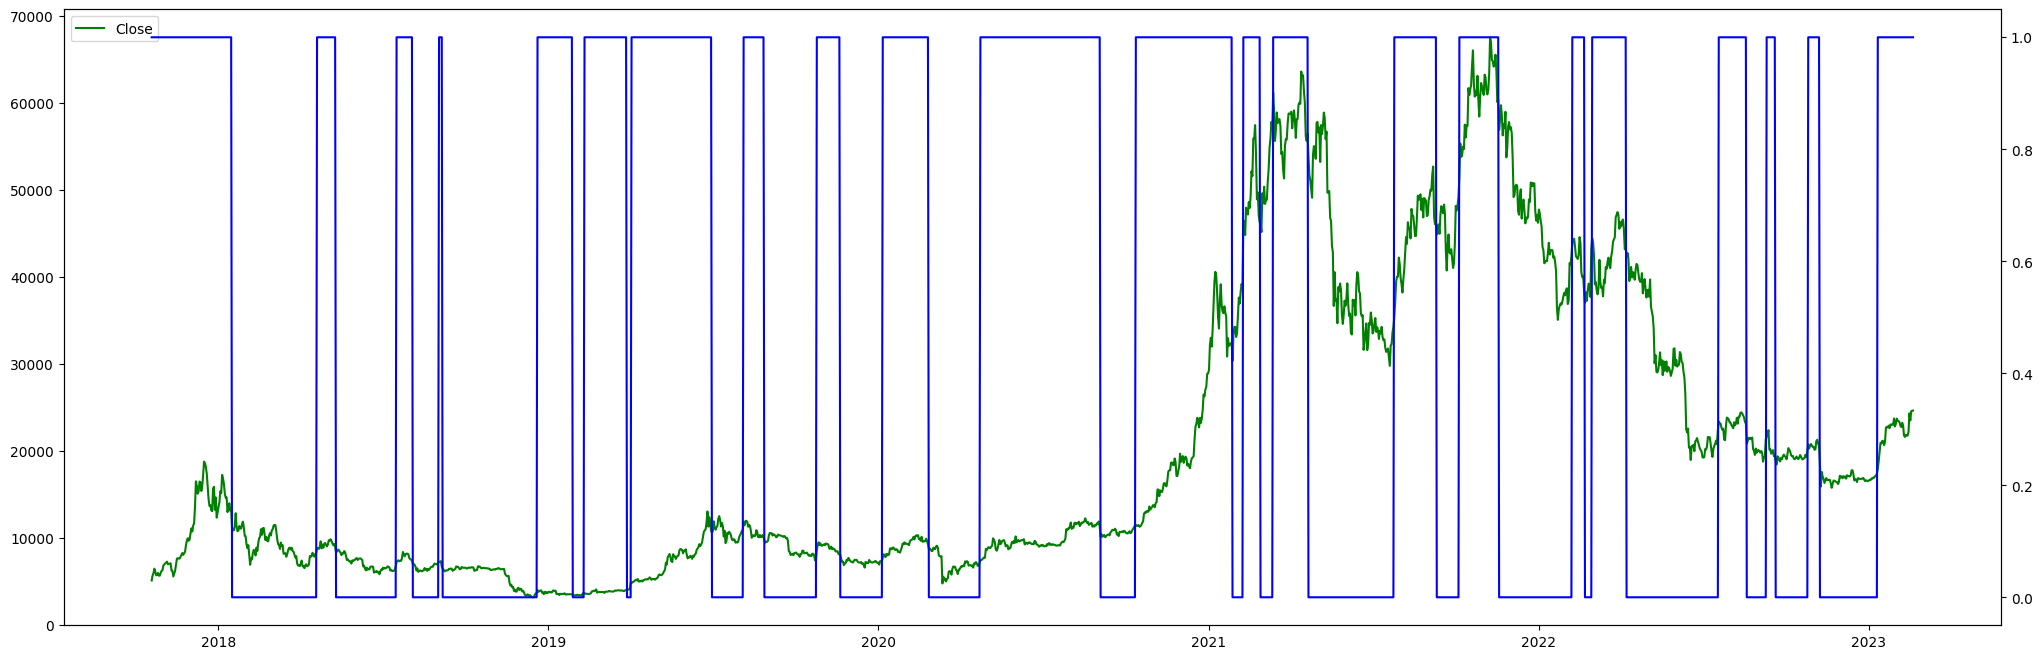

In [11]:
fig, ax = plt.subplots(1, figsize=(25,8))

ax.plot(df_day.Close, color='green',label='Close')
ax1 = ax.twinx()
ax1.plot(df_day.ST_Direction, color='blue',label='super_trend_direction')
ax.legend(loc="upper left")

In [12]:
df_day = df_day.asfreq('1d')
df_day = df_day.resample('H').ffill()['ST_Direction']
df = df.merge(df_day,left_index=True,right_index=True)

Period : [2017-10-22 15:00:00] -> [2023-02-18 02:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 3413.78 $
Performance vs US Dollar : 241.38 %
Buy and Hold Performence : 312.06 %
Performance vs Buy and Hold : -22.65 %
Best trade : +46.44 %, the 2019-06-28 02:00:00
Worst trade : -10.38 %, the 2018-09-06 14:00:00
Worst drawBack : -27.0 %
Total fees :  295.45 $

----- Trades Informations -----
Total trades on period : 80
Number of positive trades : 32
Number of negative trades :  48
Trades win rate ratio : 40.0 %
Average trades performance : 1.93 %
Average positive trades : 8.44 %
Median positive trades : 4.08 %
Average negative trades : -2.4 %
Median negative trades : -1.82 %

----- Plot -----


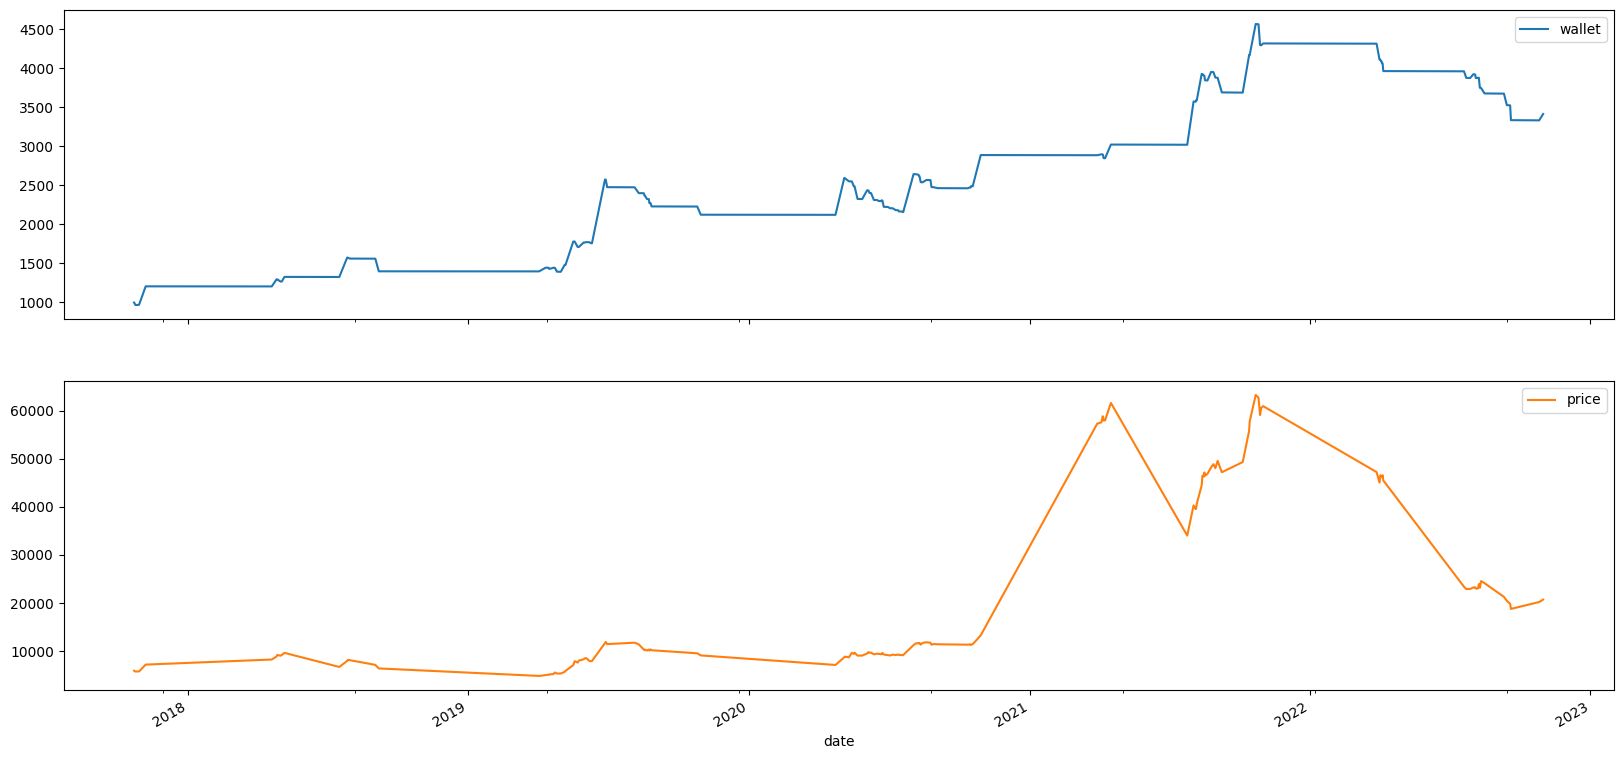

In [13]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row.EMA7>row.EMA20 and 
                    row.EMA20>row.EMA50 and   
                    row.Stoch_RSI<0.18 and
                    previous_row.Stoch_RSI>0.18 and
                    row.ST_Direction==True) else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row.EMA20<row.EMA50 and
                    row.Stoch_RSI>0.82 and
                    previous_row.Stoch_RSI<0.82)  else False


equity = strategyTester(df,buyCondition,sellCondition)

# Crocodile strategy

In [ ]:
SYMBOL='BTC'
df = loadFromDB(SYMBOL,'1h')

In [ ]:
df['EMA1']=ema_indicator(close=df['Close'], window=7)
df['EMA2']=ema_indicator(close=df['Close'], window=30)
df['EMA3']=ema_indicator(close=df['Close'], window=50)
df['EMA4']=ema_indicator(close=df['Close'], window=100)
df['EMA5']=ema_indicator(close=df['Close'], window=121)
df['EMA6']=ema_indicator(close=df['Close'], window=200)

df['STOCH_RSI'] = stochrsi(close=df['Close'], window=14, smooth1=3, smooth2=3)

In [ ]:
df_day = loadFromDB(SYMBOL,'1d')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day = df_day.asfreq('1d')
df_day = df_day.resample('H').ffill()['ST_Direction']

df = df.merge(df_day,left_index=True,right_index=True)
df.head()

In [ ]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row['EMA1'] > row['EMA2'] and
                    row['EMA2'] > row['EMA3'] and
                    row['EMA3'] > row['EMA4'] and
                    row['EMA4'] > row['EMA5'] and
                    row['EMA5']>row['EMA6'] and
                    row['ST_Direction']==True) else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row['EMA6'] > row['EMA1'] and
                    row['STOCH_RSI']>0.2) else False

strategyTester(df,buyCondition,sellCondition,equity=1000,)